In [1]:
import pandas as pd
import numpy as np

In [2]:
pd.set_option('display.max_columns', None)

In [3]:
df = pd.read_csv('train.csv')

C:\Users\Kseniia\AppData\Local\Temp\ipykernel_12504\2436019669.py:1: DtypeWarning: Columns (26) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('train.csv')


In [4]:
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

In [5]:
df[['Annual_Income', 'Num_of_Loan', 'Age', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit', 'Outstanding_Debt']] = df[['Annual_Income', 'Num_of_Loan','Age', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit', 'Outstanding_Debt']].replace(r'_$', '', regex=True)
df[['Age', 'Annual_Income', 'Num_of_Loan', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit', 'Outstanding_Debt']] = df[['Age', 'Annual_Income', 'Num_of_Loan', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit', 'Outstanding_Debt']].apply(pd.to_numeric)
df.Age = df.Age.apply(lambda x: x if x > 0 and x < 100 else np.NaN)
df.Age = df.Age.fillna(df.groupby('Customer_ID').Age.transform('max'))
df.Monthly_Inhand_Salary = df.Monthly_Inhand_Salary.fillna(df.groupby('Customer_ID').Monthly_Inhand_Salary.transform('last'))
df.Num_Bank_Accounts = df.Num_Bank_Accounts.apply(lambda x: x if x >= 0 and x <= 11 else np.NaN)
df.Num_Credit_Card = df.Num_Credit_Card.apply(lambda x: x if x >= 0 and x <= 11 else np.NaN)
df.Interest_Rate = df.Interest_Rate.apply(lambda x: x if x > 0 and x <= 34 else np.NaN)
df.Num_of_Loan = df.Num_of_Loan.apply(lambda x: x if x > 0 and x <= 9 else np.NaN)
df.Num_Bank_Accounts = df.Num_Bank_Accounts.fillna(df.groupby('Customer_ID').Num_Bank_Accounts.transform('last'))
df.Num_Credit_Card = df.Num_Credit_Card.fillna(df.groupby('Customer_ID').Num_Credit_Card.transform('last'))
df.Interest_Rate = df.Interest_Rate.fillna(df.groupby('Customer_ID').Interest_Rate.transform('last'))
df.Num_of_Loan = df.Num_of_Loan.fillna(df.groupby('Customer_ID').Num_of_Loan.transform('last'))
df.Type_of_Loan = df.Type_of_Loan.str.split(r', |, and ')
df.Type_of_Loan = df.Type_of_Loan.fillna("").apply(list)
unique_types = ['Auto Loan', 'Credit-Builder Loan', 'Personal Loan', 'Home Equity Loan', 'Not Specified', 'Student Loan', 'Mortgage Loan', 'Payday Loan', 'Debt Consolidation Loan']
for typ in unique_types:
    df[typ] = df['Type_of_Loan'].apply(lambda x: x.count(typ))
df.Delay_from_due_date = df.Delay_from_due_date.apply(lambda x: x if x >= 0 else np.NaN)
df.Delay_from_due_date = df.Delay_from_due_date.fillna(df.groupby('Customer_ID').Delay_from_due_date.transform('last'))
df.Num_of_Delayed_Payment = pd.to_numeric(df.Num_of_Delayed_Payment)
df.Num_of_Delayed_Payment = df.Num_of_Delayed_Payment.apply(lambda x: x if x >= 0 and x <= 28 else np.NaN)
df.Num_of_Delayed_Payment = df.Num_of_Delayed_Payment.fillna(df.groupby('Customer_ID').Num_of_Delayed_Payment.transform('last'))
df.Changed_Credit_Limit = df.Changed_Credit_Limit.apply(lambda x: x if x > 0 else np.NaN)
df.Changed_Credit_Limit = df.Changed_Credit_Limit.fillna(df.groupby('Customer_ID').Changed_Credit_Limit.transform('last'))
df.Num_Credit_Inquiries = df.Num_Credit_Inquiries.apply(lambda x: x if x > 0 and x <= 17 else np.NaN)
df.Num_Credit_Inquiries = df.Num_Credit_Inquiries.fillna(df.groupby('Customer_ID').Num_Credit_Inquiries.transform('last'))
df.Credit_Mix = df.Credit_Mix.apply(lambda x: x if x != '_' else np.NaN)
df.Credit_Mix = df.Credit_Mix.fillna(df.groupby('Customer_ID').Credit_Mix.transform('first'))
df.Credit_History_Age = df.Credit_History_Age.str.rstrip(' Months')
df.Credit_History_Age = df.Credit_History_Age.str.split(' Years and ')
df.Credit_History_Age = df.Credit_History_Age.apply(lambda x:  int(x[0]) * 12 + int(x[1]) if type(x) == list else x)
def add_history_month(x):
    for index, item in x.items():
        if pd.isna(item):
            x[index] = x.shift(1)[index] + 1
    return x
df.Credit_History_Age = df.groupby('Customer_ID').Credit_History_Age.apply(lambda x: add_history_month(x))
def add_history_month(x):
    for index, item in x.items():
        if pd.isna(item):
            x[index] = x.shift(-1)[index] - 1
    return x
df.Credit_History_Age = df.groupby('Customer_ID').Credit_History_Age.apply(lambda x: add_history_month(x))
df.Payment_of_Min_Amount = df.Payment_of_Min_Amount.apply(lambda x: x if x != 'NM' else np.NaN)
df.Payment_of_Min_Amount = df.Payment_of_Min_Amount.fillna(df.groupby('Customer_ID').Payment_of_Min_Amount.transform('last'))
df.Amount_invested_monthly = df.Amount_invested_monthly.apply(lambda x: x if x != '__10000__' else np.NaN)
df.Amount_invested_monthly = df.Amount_invested_monthly.fillna(df.groupby('Customer_ID').Amount_invested_monthly.transform('last'))
df.Payment_Behaviour = df.Payment_Behaviour.apply(lambda x: x if x != '!@9#%8' else np.NaN)
df.Payment_Behaviour = df.Payment_Behaviour.fillna(df.groupby('Customer_ID').Payment_Behaviour.transform('last'))
df.Monthly_Balance = df.Monthly_Balance.apply(lambda x: x if x != '__-333333333333333333333333333__' else np.NaN)
df.Monthly_Balance = df.Monthly_Balance.fillna(df.groupby('Customer_ID').Monthly_Balance.transform('last'))
df.replace({'Credit_Mix' : {'Bad': '0', 'Good' : '1', 'Standard' : '0.5'}, 'Payment_of_Min_Amount':{'Yes' : '1', 'No' : '0'}}, inplace=True)
df[['Credit_Mix','Payment_of_Min_Amount']] = df[['Credit_Mix','Payment_of_Min_Amount']].apply(pd.to_numeric)
df.Payment_Behaviour = df.Payment_Behaviour.str.replace('Low_spent_Small_value_payments','6')
df.Payment_Behaviour = df.Payment_Behaviour.str.replace('High_spent_Medium_value_payments','24')
df.Payment_Behaviour = df.Payment_Behaviour.str.replace('Low_spent_Medium_value_payments','12')
df.Payment_Behaviour = df.Payment_Behaviour.str.replace('High_spent_Large_value_payments','36')
df.Payment_Behaviour = df.Payment_Behaviour.str.replace('High_spent_Small_value_payments','12')
df.Payment_Behaviour = df.Payment_Behaviour.str.replace('Low_spent_Large_value_payments','18')
df.Annual_Income = df.Annual_Income.apply(lambda x: x if x > 160000 else np.NaN)
df.Annual_Income = df.Annual_Income.fillna(df.groupby('Customer_ID').Annual_Income.transform('last'))
df.Total_EMI_per_month = df.Total_EMI_per_month.apply(lambda x: x if x > 1700 else np.NaN)
df.Total_EMI_per_month = df.Total_EMI_per_month.fillna(df.groupby('Customer_ID').Total_EMI_per_month.transform('last'))
df.drop(df[pd.isna(df.Num_Bank_Accounts) | pd.isna(df.Num_Credit_Card) | pd.isna(df.Interest_Rate) | pd.isna(df.Num_of_Loan) | pd.isna(df.Num_Credit_Inquiries) | pd.isna(df.Credit_History_Age) | pd.isna(df.Total_EMI_per_month) | pd.isna(df.Annual_Income)].index, inplace=True)
df.drop(columns=['Type_of_Loan', 'SSN', 'Name', 'ID', 'Customer_ID', 'Month', 'Occupation'], inplace=True)

C:\Users\Kseniia\AppData\Local\Temp\ipykernel_12504\3423153080.py:38: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)
  df.Credit_History_Age = df.groupby('Customer_ID').Credit_History_Age.apply(lambda x: add_history_month(x))
C:\Users\Kseniia\AppData\Local\Temp\ipykernel_12504\3423153080.py:44: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, u

In [6]:
X = df.drop(['Credit_Score'], axis = 1)
y = df['Credit_Score']

In [7]:
pca = PCA(n_components=2)
Xt = pca.fit_transform(X)

In [8]:
y.replace({'Poor' : 'Red', 'Standard' : 'Yellow', 'Good' : 'Green'}, inplace=True)

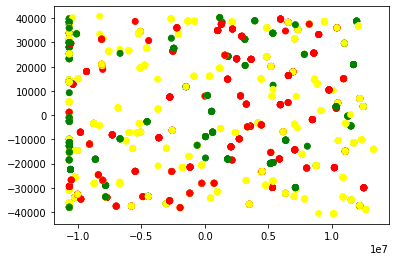

In [9]:
import matplotlib.pyplot as plt
plot = plt.scatter(Xt[:,0], Xt[:,1], c=y)
plt.show()

In [10]:
tsne = TSNE(n_components=2, learning_rate=1000,
                  init='random', perplexity=7)
Xt = tsne.fit_transform(X)

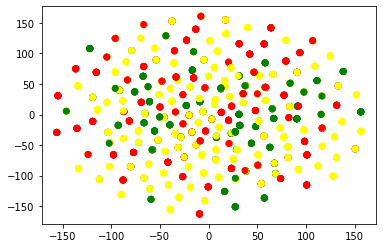

In [11]:
plot = plt.scatter(Xt[:,0], Xt[:,1], c=y)
plt.show()

Task 2

In [12]:
from sklearn.cluster import KMeans
from matplotlib.image import imread
from sklearn.datasets import load_sample_image
from sklearn.utils import shuffle
from time import time

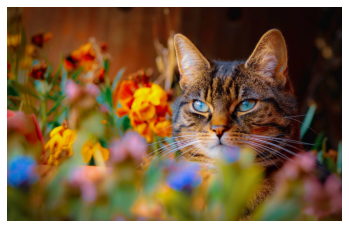

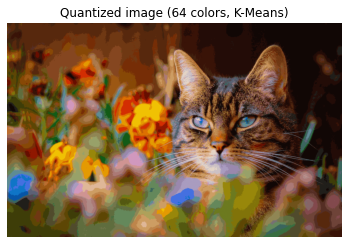

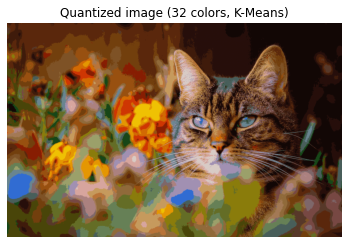

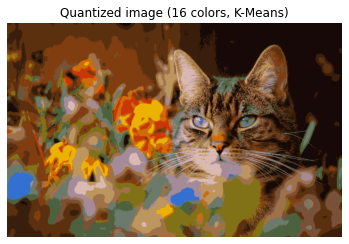

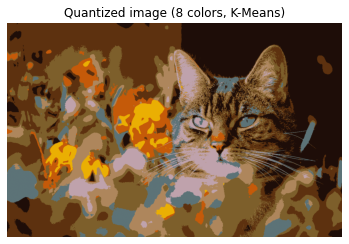

In [13]:
n_colors = [64, 32, 16, 8]
cat = imread('cat.jpg')
# Convert to floats instead of the default 8 bits integer coding. Dividing by
# 255 is important so that plt.imshow behaves works well on float data (need to
# be in the range [0-1])
cat = np.array(cat, dtype=np.float64) / 255

# Load Image and transform to a 2D numpy array.
w, h, d = original_shape = tuple(cat.shape)
assert d == 3
image_array = np.reshape(cat, (w * h, d))

plt.figure(1)
plt.clf()
plt.axis("off")
plt.imshow(cat)

i = 2
for n in n_colors:
    image_array_sample = shuffle(image_array, random_state=0, n_samples=1_000)
    kmeans = KMeans(n_clusters=n, random_state=0).fit(image_array_sample)

    labels = kmeans.predict(image_array)

    def recreate_image(codebook, labels, w, h):
        """Recreate the (compressed) image from the code book & labels"""
        return codebook[labels].reshape(w, h, -1)

    plt.figure(i)
    plt.clf()
    plt.axis("off")
    plt.title(f"Quantized image ({n} colors, K-Means)")
    plt.imshow(recreate_image(kmeans.cluster_centers_, labels, w, h))
    
    i += 1

Task 3

In [14]:
import json
raw = []
for line in open('goodreads_reviews_spoiler.json', 'r'):
    raw.append(json.loads(line))

In [15]:
df = []
for book in raw:
    for review in book['review_sentences']:
        df.append(review)
del raw

In [16]:
len(df)

17672655

In [17]:
df = pd.DataFrame(df, columns = ['Is_spoiler', 'Review'])

In [18]:
df.head()

,Is_spoiler,Review
0,0,This is a special book.
1,0,"It started slow for about the first third, the..."
2,0,This is what I love about good science fiction...
3,0,"It is a 2015 Hugo winner, and translated from ..."
4,0,For instance the intermixing of Chinese revolu...


In [19]:
from sklearn.model_selection import train_test_split

X = df.drop(['Is_spoiler'], axis = 1)
y = df['Is_spoiler']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

In [20]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(stop_words='english')
X_train_counts = vectorizer.fit_transform(X_train.Review)
#X_train_counts = res.toarray()
#vectorizer.get_feature_names_out()

In [21]:
len(vectorizer.get_feature_names_out())

333772

In [22]:
from sklearn.feature_extraction.text import TfidfTransformer
tfidf_transformer = TfidfTransformer()
X_train_tfidf = tfidf_transformer.fit_transform(X_train_counts)
X_train_tfidf.shape

(14138124, 333772)

In [23]:
from sklearn.naive_bayes import MultinomialNB
clf = MultinomialNB().fit(X_train_tfidf, y_train)

In [24]:
X_test_counts = vectorizer.transform(X_test.Review)
X_test_tfidf = tfidf_transformer.transform(X_test_counts)

In [25]:
predicted = clf.predict(X_test_tfidf)

In [26]:
np.mean(predicted == y_test)

0.9675493014490466

In [27]:
from sklearn import metrics
print(metrics.classification_report(y_test, predicted
                                    #, target_names=twenty_test.target_names
                                   ))

              precision    recall  f1-score   support

           0       0.97      1.00      0.98   3420563
           1       0.26      0.00      0.01    113968

    accuracy                           0.97   3534531
   macro avg       0.61      0.50      0.50   3534531
weighted avg       0.95      0.97      0.95   3534531



In [28]:
metrics.confusion_matrix(y_test, predicted)

array([[3419438,    1125],
       [ 113573,     395]], dtype=int64)